# **News Summarization**

1. Introduction
2. Loading the data
3. Data Pre-Processing
    - Handling Null (or) NA values
    - Lowecase Transformation
    - Removing HTML tags (if any)
4. Exploratory Data Analysis(EDA)
    - Word Cloud
    - Vocabulary of the Corpus
    - Top 50 Frequent words
    - Top 50 Bigrams and Trigrams
5. Word Embedding
6. LSTM Model
    - Building the model
    - Hyperparameter Tuning
    - Evaluating the model

In [62]:
!pip install --upgrade pip setuptools wheel
!pip install pandas
!pip install nltk
!pip install transformers
!pip install bs4
!pip install lxml
!pip install seaborn
!pip install wordcloud
!pip install scikit-learn
!pip install keras
!pip install tensorflow

  Using cached tensorflow-2.18.0-cp311-cp311-win_amd64.whl.metadata (3.3 kB)
Using cached tensorflow-2.18.0-cp311-cp311-win_amd64.whl (7.5 kB)


# ABOUT THE DATA

The main aim of the project is to generate short length descriptions of news articles and summarizing large amount of information which can be represented in compressed space. 

Dataset is from kaggle https://www.kaggle.com/code/rakshithanil/textsummarization-simple-heapq-transformers/data 


# 2. LOADING DATA

In [2]:
# Importing required libraries

# Pandas for data manipulation and analysis
import pandas as pd

# Seaborn for statistical data visualization
import seaborn as sns

# Matplotlib for plotting graphs
import matplotlib.pyplot as plt

# NLTK (Natural Language Toolkit) for text processing
import nltk
from nltk.collocations import BigramAssocMeasures, BigramCollocationFinder

# Downloading the stopwords and punkt tokenizer models from NLTK
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('punkt_tab')

# Importing stopwords from NLTK corpus
from nltk.corpus import stopwords

# Importing dispersion plot for visualizing word dispersion
from nltk.draw.dispersion import dispersion_plot

# Regular expressions for text cleaning
import re

# Importing NLTK collocations for finding bigrams and trigrams
from nltk.collocations import *

# NumPy for numerical operations
import numpy as np


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\abhin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\abhin\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\abhin\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


In [3]:
# Fetching the list of English stopwords
nltk_stops = stopwords.words('english')

In [4]:
contraction_mapping = {"ain't": "is not", "aren't": "are not","can't": "cannot", "'cause": "because", "could've": "could have", "couldn't": "could not",

                           "didn't": "did not", "doesn't": "does not", "don't": "do not", "hadn't": "had not", "hasn't": "has not", "haven't": "have not",

                           "he'd": "he would","he'll": "he will", "he's": "he is", "how'd": "how did", "how'd'y": "how do you", "how'll": "how will", "how's": "how is",

                           "I'd": "I would", "I'd've": "I would have", "I'll": "I will", "I'll've": "I will have","I'm": "I am", "I've": "I have", "i'd": "i would",

                           "i'd've": "i would have", "i'll": "i will",  "i'll've": "i will have","i'm": "i am", "i've": "i have", "isn't": "is not", "it'd": "it would",

                           "it'd've": "it would have", "it'll": "it will", "it'll've": "it will have","it's": "it is", "let's": "let us", "ma'am": "madam",

                           "mayn't": "may not", "might've": "might have","mightn't": "might not","mightn't've": "might not have", "must've": "must have",

                           "mustn't": "must not", "mustn't've": "must not have", "needn't": "need not", "needn't've": "need not have","o'clock": "of the clock",

                           "oughtn't": "ought not", "oughtn't've": "ought not have", "shan't": "shall not", "sha'n't": "shall not", "shan't've": "shall not have",

                           "she'd": "she would", "she'd've": "she would have", "she'll": "she will", "she'll've": "she will have", "she's": "she is",

                           "should've": "should have", "shouldn't": "should not", "shouldn't've": "should not have", "so've": "so have","so's": "so as",

                           "this's": "this is","that'd": "that would", "that'd've": "that would have", "that's": "that is", "there'd": "there would",

                           "there'd've": "there would have", "there's": "there is", "here's": "here is","they'd": "they would", "they'd've": "they would have",

                           "they'll": "they will", "they'll've": "they will have", "they're": "they are", "they've": "they have", "to've": "to have",

                           "wasn't": "was not", "we'd": "we would", "we'd've": "we would have", "we'll": "we will", "we'll've": "we will have", "we're": "we are",

                           "we've": "we have", "weren't": "were not", "what'll": "what will", "what'll've": "what will have", "what're": "what are",

                           "what's": "what is", "what've": "what have", "when's": "when is", "when've": "when have", "where'd": "where did", "where's": "where is",

                           "where've": "where have", "who'll": "who will", "who'll've": "who will have", "who's": "who is", "who've": "who have",

                           "why's": "why is", "why've": "why have", "will've": "will have", "won't": "will not", "won't've": "will not have",

                           "would've": "would have", "wouldn't": "would not", "wouldn't've": "would not have", "y'all": "you all",

                           "y'all'd": "you all would","y'all'd've": "you all would have","y'all're": "you all are","y'all've": "you all have",

                           "you'd": "you would", "you'd've": "you would have", "you'll": "you will", "you'll've": "you will have",

                           "you're": "you are", "you've": "you have"}

In [ ]:
import zipfile
import pandas as pd

file = 'data.zip'
df = pd.read_csv(file)

# Display the DataFrame
print(df.head())

                                         id  \
0  0001d1afc246a7964130f43ae940af6bc6c57f01   
1  0002095e55fcbd3a2f366d9bf92a95433dc305ef   
2  00027e965c8264c35cc1bc55556db388da82b07f   
3  0002c17436637c4fe1837c935c04de47adb18e9a   
4  0003ad6ef0c37534f80b55b4235108024b407f0b   

                                             article  \
0  By . Associated Press . PUBLISHED: . 14:11 EST...   
1  (CNN) -- Ralph Mata was an internal affairs li...   
2  A drunk driver who killed a young woman in a h...   
3  (CNN) -- With a breezy sweep of his pen Presid...   
4  Fleetwood are the only team still to have a 10...   

                                          highlights  
0  Bishop John Folda, of North Dakota, is taking ...  
1  Criminal complaint: Cop used his role to help ...  
2  Craig Eccleston-Todd, 27, had drunk at least t...  
3  Nina dos Santos says Europe must be ready to a...  
4  Fleetwood top of League One after 2-0 win at S...  


In [6]:
# Downsampling the data to 0.5% of the original dataset
# 'frac=0.005' means 0.5% of the data is randomly sampled
# 'random_state=42' ensures reproducibility of the random sampling
news_summary_df = df.sample(frac=0.005, random_state=42)

# Printing the shape of the downsampled DataFrame
# This will show the number of rows and columns in the downsampled dataset
print(f'The downsampled dataset contains {news_summary_df.shape[0]} rows and {news_summary_df.shape[1]} columns.')

The downsampled dataset contains 1436 rows and 3 columns.


In [7]:
# Displaying the first 5 rows of the downsampled DataFrame
# This helps in getting a quick overview of the data structure and content
news_summary_df.head()

,id,article,highlights
272581,ed0fed726929c1eeabe6c390e47128dbb7d7a055,By . Mia De Graaf . Britons flocked to beaches...,People enjoyed temperatures of 17C at Brighton...
772,023cd84001b33aed4ff0f3f5ecb0fdd2151cf543,A couple who weighed a combined 32st were sham...,Couple started piling on pounds after the birt...
171868,6a70a0d8d3ed365fe1df6d35f1587a8b9b298618,Video footage shows the heart stopping moment ...,A 17-year-old boy suffering lacerations to his...
63167,b37204c13ea38b511265e41ac69fb12acfb63f85,"Istanbul, Turkey (CNN) -- About 250 people rac...",Syrians citizens hightail it to Turkey .\nMost...
68522,c24e5805afd5145bc48410e876db91d44a06be5e,By . Daily Mail Reporter . PUBLISHED: . 12:53 ...,The Xue Long had provided the helicopter that ...


In [8]:
# Accessing the element at the first row and second column of the DataFrame
# 'iloc' is used for integer-location based indexing
# This will fetch the value in the first row (index 0) and second column (index 1)
first_row_second_column = news_summary_df.iloc[0, 1]

# Printing the fetched value to verify
print(f'The value at the first row and second column is: {first_row_second_column}')

The value at the first row and second column is: By . Mia De Graaf . Britons flocked to beaches across the southern coast yesterday as millions look set to bask in glorious sunshine today. Temperatures soared to 17C in Brighton and Dorset, with people starting their long weekend in deck chairs by the sea. Figures from Asda suggest the unexpected sunshine has also inspired a wave of impromptu barbecues, with sales of sausages and equipment expected to triple those in April. Sun's out: Brighton beach was packed with Britons enjoying the unexpected sunshine to start the long weekend as temperatures hit 17C across the south coast . Although frost is set to hit the south tonight - with temperatures dropping to 1C - Britons stocking up for a barbecue will be in luck tomorrow, with forecasters predicting dry and sunny weather across southern England, southern Wales and the south Midlands. In Weymouth, Dorset, the sun came out in time for the town's annual kite festival, held on the beach. But

Articles column contains the articles whereas the highlights column shown below contains the summary



In [9]:
news_summary_df.iloc[0,2] #summary

'People enjoyed temperatures of 17C at Brighton beach in West Sussex and Weymouth in Dorset .\nAsda claims it will sell a million sausages over long weekend despite night temperatures dropping to minus 1C .\nBut the good weather has not been enjoyed by all as the north west and Scotland have seen heavy rain .'

In [10]:
# Dropping the 'id' column from the DataFrame
# The 'id' column is considered irrelevant for the analysis

news_df = news_summary_df.drop('id', axis=1)

In [11]:
news_df

,article,highlights
272581,By . Mia De Graaf . Britons flocked to beaches...,People enjoyed temperatures of 17C at Brighton...
772,A couple who weighed a combined 32st were sham...,Couple started piling on pounds after the birt...
171868,Video footage shows the heart stopping moment ...,A 17-year-old boy suffering lacerations to his...
63167,"Istanbul, Turkey (CNN) -- About 250 people rac...",Syrians citizens hightail it to Turkey .\nMost...
68522,By . Daily Mail Reporter . PUBLISHED: . 12:53 ...,The Xue Long had provided the helicopter that ...
...,...,...
213595,Beijing (CNN) -- An outbreak of polio has been...,Outbreak reported in western Xinjiang province...
254538,By . John Hall . North and South Korean warshi...,Officials from the South say North Korean ship...
34652,"Washington (CNN) -- Among the 90,000 secret U....",Documents posted on WikiLeaks.org include poss...
111903,By . Daily Mail Reporter . Shocking video from...,The bomber apparently mistook the U.S. soldier...


# 3. DATA PRE-PROCESSING

#### Handling `null/na` values

In [12]:
# Displaying the summary information of the DataFrame
# This includes the number of non-null entries, data types, and memory usage
news_df.info()

# Displaying the first 5 rows of the DataFrame after dropping the 'id' column
# This helps in verifying that the 'id' column has been successfully removed
print(news_df.head())

<class 'pandas.core.frame.DataFrame'>
Index: 1436 entries, 272581 to 257070
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   article     1436 non-null   object
 1   highlights  1436 non-null   object
dtypes: object(2)
memory usage: 33.7+ KB
                                                  article  \
272581  By . Mia De Graaf . Britons flocked to beaches...   
772     A couple who weighed a combined 32st were sham...   
171868  Video footage shows the heart stopping moment ...   
63167   Istanbul, Turkey (CNN) -- About 250 people rac...   
68522   By . Daily Mail Reporter . PUBLISHED: . 12:53 ...   

                                               highlights  
272581  People enjoyed temperatures of 17C at Brighton...  
772     Couple started piling on pounds after the birt...  
171868  A 17-year-old boy suffering lacerations to his...  
63167   Syrians citizens hightail it to Turkey .\nMost...  
68522   The Xue Long had

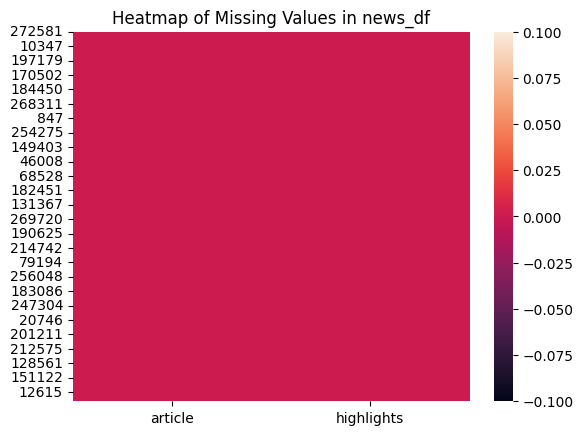

In [13]:
# Visualizing the presence of missing values in the DataFrame using a heatmap
# 'isna()' returns a DataFrame of the same shape indicating missing values with True
# 'sns.heatmap()' creates a heatmap to visualize the missing values
# This helps in quickly identifying columns with missing data
sns.heatmap(news_df.isna())

# Adding a title to the heatmap for better context
plt.title('Heatmap of Missing Values in news_df')

# Displaying the heatmap
plt.show()

In [14]:
news_df[news_df['article'].isna()]

,article,highlights


No null or na values in the data

#### Lowercase Transformation

In [15]:
# Converting the text in the 'article' column to lowercase
# This helps in standardizing the text data for further processing
news_df['article'] = news_df['article'].apply(str.lower)

# Converting the text in the 'highlights' column to lowercase
# This ensures consistency in text data for the highlights as well
news_df['highlights'] = news_df['highlights'].apply(str.lower)

#### Remove HTML tags (if any)

In [16]:
# Importing BeautifulSoup from the bs4 library for HTML parsing
from bs4 import BeautifulSoup

# Defining a function to remove HTML tags from a given text
# This function takes a raw text string as input and returns the text without HTML tags
def remove_tags(raw_text: str) -> str:
    # Parsing the raw text with BeautifulSoup using the 'lxml' parser
    # '.text' extracts the text content from the parsed HTML
    return BeautifulSoup(raw_text, "lxml").text

In [17]:
# Applying the remove_tags function to the 'article' column
# This removes any HTML tags from the text in the 'article' column
# The lambda function is used to apply the remove_tags function to each entry in the column
news_df['article'] = news_df['article'].apply(lambda text: remove_tags(text))

# Displaying the first 5 rows of the DataFrame to verify the changes
# This helps in ensuring that the HTML tags have been successfully removed
print(news_df['article'].head())

272581    by . mia de graaf . britons flocked to beaches...
772       a couple who weighed a combined 32st were sham...
171868    video footage shows the heart stopping moment ...
63167     istanbul, turkey (cnn) -- about 250 people rac...
68522     by . daily mail reporter . published: . 12:53 ...
Name: article, dtype: object


#### Not Removing Stop Words,and No Lemmetaization/Stemming - we do not want to loose the sentence structure since we have to predict grammatical correct sentences

In [18]:
# data after pre processing
news_df.head()

,article,highlights
272581,by . mia de graaf . britons flocked to beaches...,people enjoyed temperatures of 17c at brighton...
772,a couple who weighed a combined 32st were sham...,couple started piling on pounds after the birt...
171868,video footage shows the heart stopping moment ...,a 17-year-old boy suffering lacerations to his...
63167,"istanbul, turkey (cnn) -- about 250 people rac...",syrians citizens hightail it to turkey .\nmost...
68522,by . daily mail reporter . published: . 12:53 ...,the xue long had provided the helicopter that ...


In [19]:
# Importing the set of English stopwords from NLTK
stop_words = set(stopwords.words('english'))

# Function to clean the text in the 'article' column
def text_cleaner(text):
    # Convert text to lowercase
    newString = text.lower()
    # Remove HTML tags using BeautifulSoup
    newString = BeautifulSoup(newString, "lxml").text
    # Remove text within parentheses
    newString = re.sub(r'\([^)]*\)', '', newString)
    # Remove double quotes
    newString = re.sub('"', '', newString)
    # Replace contractions with their expanded forms
    newString = ' '.join([contraction_mapping[t] if t in contraction_mapping else t for t in newString.split(" ")])
    # Remove possessive 's
    newString = re.sub(r"'s\b", "", newString)
    # Remove non-alphabetic characters
    newString = re.sub("[^a-zA-Z]", " ", newString)
    # Remove stopwords
    tokens = [w for w in newString.split() if not w in stop_words]
    # Remove short words (length <= 1)
    long_words = [i for i in tokens if len(i) > 1]
    # Join the cleaned words back into a single string
    return (" ".join(long_words)).strip()

cleaned_text = []
for t in news_df['article']:
    cleaned_text.append(text_cleaner(t))

def summary_cleaner(text):
    # Remove double quotes
    newString = re.sub('"', '', text)
    # Replace contractions with their expanded forms
    newString = ' '.join([contraction_mapping[t] if t in contraction_mapping else t for t in newString.split(" ")])
    # Remove possessive 's
    newString = re.sub(r"'s\b", "", newString)
    # Remove non-alphabetic characters
    newString = re.sub("[^a-zA-Z]", " ", newString)
    # Convert text to lowercase
    newString = newString.lower()
    # Split text into tokens
    tokens = newString.split()
    # Remove short words (length < 3)
    newString = ' '.join([i for i in tokens if len(i) >= 3])
    return newString

cleaned_summary = []
for t in news_df['highlights']:
    cleaned_summary.append(summary_cleaner(t))

news_df['cleaned_text'] = cleaned_text
news_df['cleaned_summary'] = cleaned_summary

news_df.replace('', np.nan, inplace=True)
news_df.dropna(axis=0, inplace=True)

print("done")

done


In [20]:
cleaned_text =np.array(news_df['cleaned_text'])
cleaned_summary=np.array(news_df['cleaned_summary'])

short_text=[]
short_summary=[]

for i in range(len(cleaned_text)):
    if(len(cleaned_summary[i].split())<=63 and len(cleaned_text[i].split())<=600):
        short_text.append(cleaned_text[i])
        short_summary.append(cleaned_summary[i])



In [21]:
news_df=pd.DataFrame({'article':short_text,'highlights':short_summary})


In [22]:
news_df.head()

,article,highlights
0,mia de graaf britons flocked beaches across so...,people enjoyed temperatures brighton beach wes...
1,couple weighed combined st shamed slimming fam...,couple started piling pounds after the birth t...
2,istanbul turkey people raced across syrian bor...,syrians citizens hightail turkey most them are...
3,gone fishing phrase usually associated quiet a...,two fishermen russia are knocked over the blas...
4,feminist today feminism utterly irrelevant ang...,angela epstein argues that feminism has lost i...


In [23]:
news_df.iloc[0,1]

'people enjoyed temperatures brighton beach west sussex and weymouth dorset asda claims will sell million sausages over long weekend despite night temperatures dropping minus but the good weather has not been enjoyed all the north west and scotland have seen heavy rain'

# DATA EXPLORATION (or) CORPUS STATISTICS



In [24]:
text = ' '.join(news_df['article'])

#### TYPE TOKEN RATIO (TTR) - LEXICAL RICHNESS OF THE CORPUS

A type-token ratio (TTR) is the total number of UNIQUE words (types) divided by the total number of words (tokens) in a given segment of language.

The closer the TTR ratio is to 1, the greater the lexical richness of the segment.

In [25]:
tokens = nltk.word_tokenize(text)

In [26]:
total_tokens  = len(tokens) 
unique_tokens = len(set(tokens))

In [27]:
total_tokens

377444

In [28]:
unique_tokens

31230

In [29]:
# ttr ratio
unique_tokens/total_tokens 

0.08274075094583568

In [30]:
# removing stop words for preparing the word cloud and frequency analysis
tokens = [token for token in tokens if token not in nltk_stops]

In [31]:
# removing punctuation
tokens = [token for token in tokens if token.isalpha()]

#### Top 20 Frequent words

In [32]:
# Creating a frequency distribution of the tokens
# 'FreqDist' calculates the frequency of each token in the list
fdist = nltk.FreqDist(tokens)

# Extracting the 20 most common tokens
# 'most_common(20)' returns a list of the 20 most frequent tokens and their counts
top_tokens = fdist.most_common(20)

# Displaying the top 20 most common tokens and their frequencies
top_tokens

[('said', 4677),
 ('one', 1764),
 ('year', 1663),
 ('would', 1450),
 ('two', 1205),
 ('new', 1181),
 ('also', 1178),
 ('people', 1167),
 ('time', 1145),
 ('first', 1047),
 ('could', 1024),
 ('last', 1004),
 ('years', 953),
 ('told', 932),
 ('like', 885),
 ('old', 837),
 ('police', 836),
 ('mr', 794),
 ('world', 766),
 ('back', 682)]

<Axes: title={'center': 'Top 20 Tokens by Frequency'}, xlabel='Samples', ylabel='Counts'>

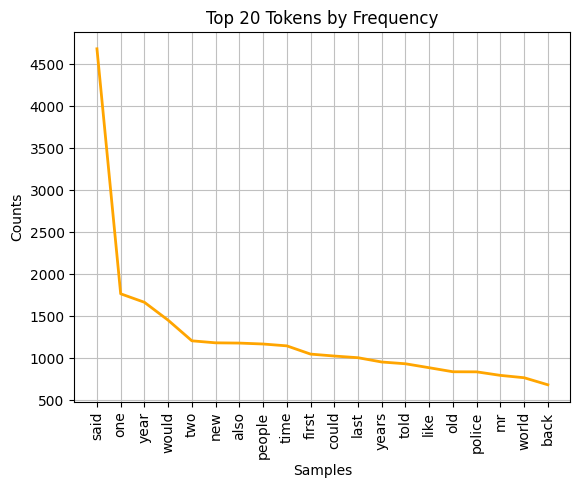

In [33]:
# frequency plot:
fdist.plot(20, title="Top 20 Tokens by Frequency", color='orange')

#### Word Cloud

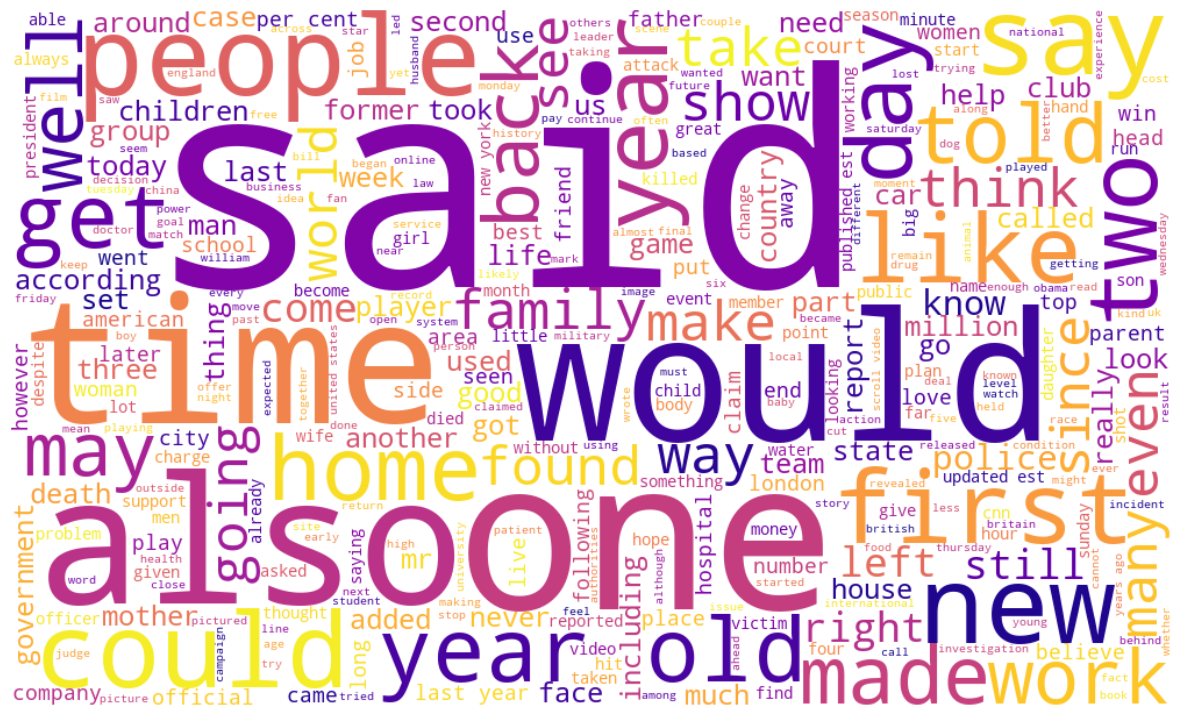

In [34]:
# Importing necessary components from the wordcloud library
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

# Generating a word cloud from the provided text
# 'stopwords' parameter is set to the list of stopwords from NLTK
# 'background_color' sets the background color of the word cloud
# 'max_words' limits the number of words in the word cloud
# 'width' and 'height' set the dimensions of the word cloud image
# 'max_font_size' sets the maximum font size for the largest word
# 'random_state' ensures reproducibility of the word cloud
# 'colormap' sets the color map for the word cloud
wordcloud = WordCloud(stopwords=nltk_stops,
                      background_color="white", 
                      max_words=350, 
                      width=1000, 
                      height=600, 
                      max_font_size=256,
                      random_state=1, 
                      colormap='plasma').generate(text)

# Plotting the word cloud object
# 'figsize' sets the size of the figure
plt.figure(figsize=(15, 15))
# 'imshow' displays the word cloud image
plt.imshow(wordcloud, interpolation='bilinear')
# 'axis("off")' hides the axes
plt.axis("off")
# Displaying the plot
plt.show()

In [35]:
# visualizing hapaxes
fdist.hapaxes()[:20]

['bask',
 'barbecues',
 'deckchairs',
 'sarongs',
 'kites',
 'biddulph',
 'staffs',
 'taunts',
 'flippant',
 'shrunk',
 'varicose',
 'ensures',
 'gibsons',
 'propoints',
 'allots',
 'carbohydrate',
 'slimline',
 'gripping',
 'hustled',
 'hatay']

#### Top 20 Bigrams and Trigrams

In [36]:
import re

def alpha_filter(word):
    """
    Function to check if a word contains only non-alphabetical characters.
    
    Parameters:
    word (str): The word to be checked.
    
    Returns:
    bool: True if the word contains only non-alphabetical characters, False otherwise.
    """
    # Compile a regular expression pattern to match words with only non-alphabetical characters
    pattern = re.compile('^[^a-z]+$')
    
    # Check if the word matches the pattern
    if pattern.match(word):
        return True
    else:
        return False

In [37]:
# Initializing bigram association measures
bigram_measures = nltk.collocations.BigramAssocMeasures()

# Creating a BigramCollocationFinder from the list of tokens
finder = BigramCollocationFinder.from_words(tokens)

# Removing punctuation and non-alphabetical tokens using the alpha_filter function
finder.apply_word_filter(alpha_filter)

# Removing stopwords using a lambda function
finder.apply_word_filter(lambda w: w in nltk_stops)

# Scoring the bigrams based on their raw frequency
bigram_scored = finder.score_ngrams(bigram_measures.raw_freq)
bigram_scored[:20]

[(('year', 'old'), 0.0016126251574829255),
 (('per', 'cent'), 0.0007824414826603011),
 (('last', 'year'), 0.0007532656985611034),
 (('updated', 'est'), 0.0006498242822094026),
 (('published', 'est'), 0.0006233008421192229),
 (('new', 'york'), 0.000527816457794576),
 (('united', 'states'), 0.00043233207346992904),
 (('years', 'ago'), 0.0003819375372985876),
 (('scroll', 'video'), 0.00037928519328956966),
 (('told', 'cnn'), 0.0003209336250911743),
 (('first', 'time'), 0.00031828128108215637),
 (('last', 'week'), 0.0003156289370731384),
 (('prime', 'minister'), 0.0003156289370731384),
 (('premier', 'league'), 0.0002891054969829587),
 (('last', 'month'), 0.0002811484649559048),
 (('world', 'cup'), 0.0002784961209468868),
 (('two', 'years'), 0.00025727736887474307),
 (('los', 'angeles'), 0.00023075392878456336),
 (('daily', 'mail'), 0.0002174922087394735),
 (('contributed', 'report'), 0.00021218752072143756)]

In [38]:
# visualizing ngrams
def visualize_ngrams_topn(scores:list,n:int):
    x_val = []
    y_val = []
    for ngram in scores[n::-1]:
        x_val.append(' '.join(ngram[0]))
        y_val.append(ngram[1])
    plt.figure(figsize=(10,10))
    plt.barh(x_val,y_val,color='orange')

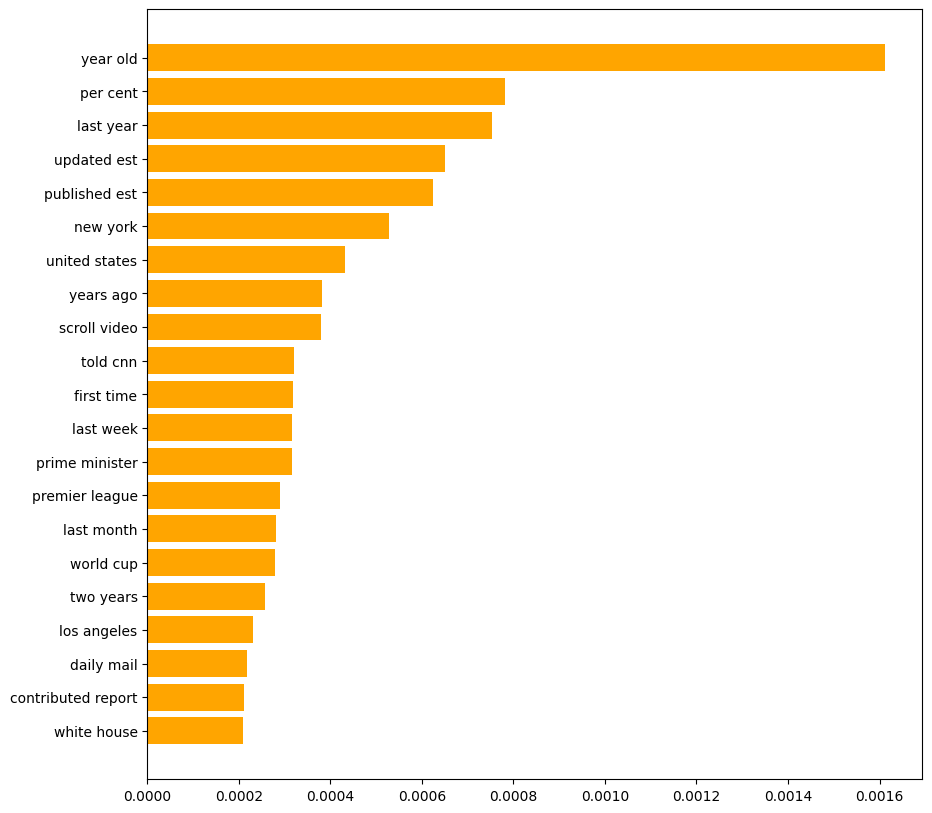

In [39]:
visualize_ngrams_topn(bigram_scored,20)

In [40]:
trigram_measures = nltk.collocations.TrigramAssocMeasures()
finder = TrigramCollocationFinder.from_words(tokens)

# removing punctuation, non - aplhabetical tokens
finder.apply_word_filter(alpha_filter)

# removing stop words
finder.apply_word_filter(lambda w: w in nltk_stops)

trigram_scored = finder.score_ngrams(trigram_measures.raw_freq)
trigram_scored[:20]

[(('daily', 'mail', 'reporter'), 0.00015383595252304225),
 (('president', 'barack', 'obama'), 0.00011935548040580864),
 (('reporter', 'published', 'est'), 0.00011670313639679067),
 (('mail', 'reporter', 'published'), 0.00010874610436973675),
 (('new', 'york', 'city'), 9.54843843246469e-05),
 (('year', 'old', 'girl'), 7.691797626152112e-05),
 (('updated', 'est', 'december'), 7.161328824348519e-05),
 (('december', 'updated', 'est'), 6.896094423446722e-05),
 (('est', 'december', 'updated'), 6.896094423446722e-05),
 (('est', 'may', 'updated'), 6.896094423446722e-05),
 (('may', 'updated', 'est'), 6.896094423446722e-05),
 (('published', 'est', 'december'), 6.896094423446722e-05),
 (('published', 'est', 'may'), 6.896094423446722e-05),
 (('updated', 'est', 'may'), 6.896094423446722e-05),
 (('year', 'old', 'son'), 6.896094423446722e-05),
 (('est', 'october', 'updated'), 6.365625621643127e-05),
 (('october', 'updated', 'est'), 6.365625621643127e-05),
 (('published', 'est', 'october'), 6.36562562

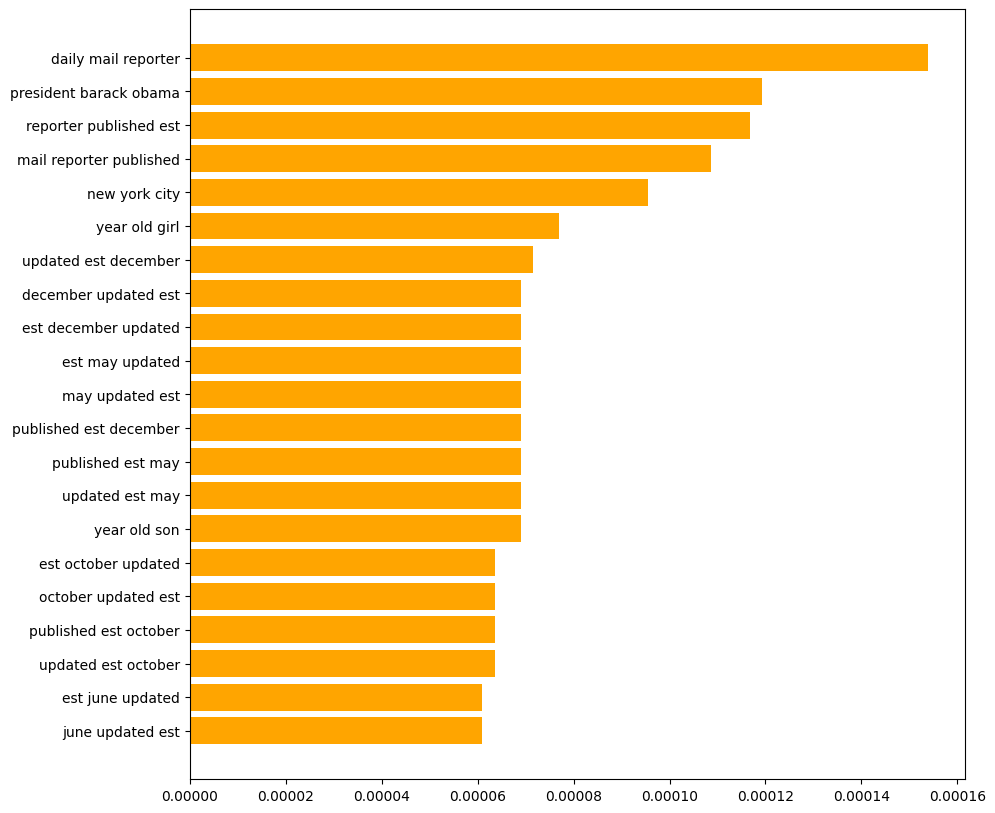

In [41]:
visualize_ngrams_topn(trigram_scored,20)

In [42]:
news_df['highlights']=news_df['highlights'].apply(lambda x:'sostok '+x+' eostok')
news_df.head()

,article,highlights
0,mia de graaf britons flocked beaches across so...,sostok people enjoyed temperatures brighton be...
1,couple weighed combined st shamed slimming fam...,sostok couple started piling pounds after the ...
2,istanbul turkey people raced across syrian bor...,sostok syrians citizens hightail turkey most t...
3,gone fishing phrase usually associated quiet a...,sostok two fishermen russia are knocked over t...
4,feminist today feminism utterly irrelevant ang...,sostok angela epstein argues that feminism has...


In [43]:
from sklearn.model_selection import train_test_split


# Convert the 'article' and 'highlights' columns of the DataFrame to numpy arrays
articles = np.array(news_df['article'])
highlights = np.array(news_df['highlights'])

# Split the data into training and testing sets
# test_size=0.1 means 10% of the data will be used for testing, and 90% for training
# random_state=0 ensures reproducibility of the split
# shuffle=True ensures the data is shuffled before splitting
X_train, X_test, Y_train, Y_test = train_test_split(articles, highlights, test_size=0.1, random_state=0, shuffle=True)


In [44]:
X_train.shape,X_test.shape,Y_train.shape,Y_test.shape

((1041,), (116,), (1041,), (116,))

In [45]:
X_train[2]

'alex ward published est july updated est july falklands war hero simon weston pulled standing one britain first police crime commissioners saying become political former welsh guardsmen suffered horrific burns per cent body falklands conflict announced decision twitter monday tweeted regret pulling pcc role south wales became disillusioned fact getting political serving people political falklands war hero simon weston announced standing one britain first police crime commissioners tweeting decision weston tweeted reasons stood race become police crime commissioner south wales mr weston lives cardiff planned stand independent candidate year job previous criminal conviction also brought mr weston standing question legislation creating commissioners bars candidates convicted imprisonable offences mr weston convicted fined passenger stolen car home secretary theresa may assured former soldier could apply role despite juvenile criminal conviction law aimed people conviction age coalition f

In [46]:
Y_train[2]

'sostok simon weston announces will longer stand the race the police and crime commissioner for south wales the falklands veteran tweeted that was disillusioned with the race was too political and not serving the people criminal conviction when was had also drawn weston standing into question eostok'

# 4. Word Embedding

In [47]:
from tensorflow.keras.preprocessing.text import Tokenizer 
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [48]:
voc_size = unique_tokens  # Set the vocabulary size to the number of unique tokens
embedding_width = 300     # Set the width of the embedding vectors to 300 dimensions
max_sum_len = 63          # Set the maximum length of the summary to 63 tokens
max_text_len = 600        # Set the maximum length of the text to 600 tokens


In [49]:
# Initialize a tokenizer for the input text
X_tokenizer = Tokenizer()
# Fit the tokenizer on the training data
X_tokenizer.fit_on_texts(list(X_train))

# Set the threshold for word frequency
thresh = 4
cnt = 0
tot_cnt = 0
freq = 0
tot_freq = 0

# Calculate the total number of words and their frequencies
for key, value in X_tokenizer.word_counts.items():
    tot_cnt += 1
    tot_freq += value
    if value < thresh:
        cnt += 1
        freq += value

# Reinitialize the tokenizer with the total word count
X_tokenizer = Tokenizer(num_words=tot_cnt)
# Fit the tokenizer on the training data again
X_tokenizer.fit_on_texts(list(X_train))
# Convert the training and testing texts to sequences
X_train_seq = X_tokenizer.texts_to_sequences(X_train)
X_test_seq = X_tokenizer.texts_to_sequences(X_test)
# Pad the sequences to ensure uniform length
X_train = pad_sequences(X_train_seq, maxlen=max_text_len, padding='post')
X_test = pad_sequences(X_test_seq, maxlen=max_text_len, padding='post')
# Get the vocabulary size for the input text
X_voc = X_tokenizer.num_words + 1

# Initialize a tokenizer for the summaries
Y_tokenizer = Tokenizer()
# Fit the tokenizer on the training summaries
Y_tokenizer.fit_on_texts(list(Y_train))

# Set the threshold for word frequency
thresh = 6
cnt = 0
tot_cnt = 0
freq = 0
tot_freq = 0

# Calculate the total number of words and their frequencies
for key, value in Y_tokenizer.word_counts.items():
    tot_cnt += 1
    tot_freq += value
    if value < thresh:
        cnt += 1
        freq += value

# Reinitialize the tokenizer with the total word count
Y_tokenizer = Tokenizer(num_words=tot_cnt)
# Fit the tokenizer on the training summaries again
Y_tokenizer.fit_on_texts(list(Y_train))
# Convert the training and testing summaries to sequences
Y_train_seq = Y_tokenizer.texts_to_sequences(Y_train)
Y_test_seq = Y_tokenizer.texts_to_sequences(Y_test)
# Pad the sequences to ensure uniform length
Y_train = pad_sequences(Y_train_seq, maxlen=max_sum_len, padding='post')
Y_test = pad_sequences(Y_test_seq, maxlen=max_sum_len, padding='post')
# Get the vocabulary size for the summaries
Y_voc = Y_tokenizer.num_words + 1

In [50]:
ind = []  # Initialize an empty list to store indices

# Iterate over each training summary
for i in range(len(Y_train)):
    cnt = 0  # Initialize a counter for non-zero tokens
    # Count the number of non-zero tokens in the summary
    for j in Y_train[i]:
        if j != 0:
            cnt += 1
    # If the summary has only 2 non-zero tokens, add its index to the list
    if cnt == 2:
        ind.append(i)

# Remove the summaries with only 2 non-zero tokens from the training data
Y_train = np.delete(Y_train, ind, axis=0)
X_train = np.delete(X_train, ind, axis=0)

ind = []  # Reinitialize the list to store indices

# Iterate over each testing summary
for i in range(len(Y_test)):
    cnt = 0  # Initialize a counter for non-zero tokens
    # Count the number of non-zero tokens in the summary
    for j in Y_test[i]:
        if j != 0:
            cnt += 1
    # If the summary has only 2 non-zero tokens, add its index to the list
    if cnt == 2:
        ind.append(i)

# Remove the summaries with only 2 non-zero tokens from the testing data
Y_test = np.delete(Y_test, ind, axis=0)
X_test = np.delete(X_test, ind, axis=0)

In [51]:
# Path to the local GloVe embeddings zip file
print("Loading word embeddings...")

# Initialize an empty dictionary to store the word embeddings
embeddings_index = dict()

# Open the zip file
with zipfile.ZipFile('../data/glove.twitter.27B.100d.zip', 'r') as z:
    # Open the GloVe embeddings file within the zip file
    with z.open('glove.twitter.27B.100d.txt') as f:
        # Iterate through each line in the file
        for line in f:
            # Decode the line to convert bytes to string
            line = line.decode('utf-8')
            # Split the line on white space to separate the word and its vector components
            values = line.split()
            # The first value is the word
            word = values[0]
            # The remaining values are the vector components, converted to a numpy array of type float32
            coefs = np.asarray(values[1:], dtype='float32')
            # Add the word and its vector to the dictionary
            embeddings_index[word] = coefs

# Print the number of word vectors loaded
print('Loaded %s word vectors.' % len(embeddings_index))

Loading word embeddings...
Loaded 1193514 word vectors.


In [52]:
# Fill our matrix value with zeroes. A vector of zeroes will be the default if we don't match a token with the gloVe vocabulary.
embeddings_index = {}

word_index = X_tokenizer.word_index
embedding_matrix = np.zeros((len(word_index) + 1, 300))
for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
    # words not found in embedding index will be all-zeros.
        embedding_matrix[i] = embedding_vector
print("done")

done


In [53]:
X_voc,embedding_matrix.shape

(29446, (29446, 300))

# 5. LSTM Model

In [54]:
from tensorflow.keras.layers import LSTM,Dense,Input,Embedding
from tensorflow.keras.models import Model
from tensorflow.keras.layers import TimeDistributed


In [55]:
from keras import backend as k  # Import Keras backend

k.clear_session()  # Clear any existing Keras sessions

latent_dim = 300  # Set the latent dimension for the LSTM layers
embedding_dim = 300  # Set the embedding dimension

# Encoder
encoder_inputs = Input(shape=(max_text_len,))  # Define the input shape for the encoder

# Embedding layer for the encoder
enc_emb = Embedding(X_voc, embedding_dim, weights=[embedding_matrix], trainable=True)(encoder_inputs)

# First LSTM layer for the encoder
encoder_lstm1 = LSTM(latent_dim, return_sequences=True, return_state=True, dropout=0.4, recurrent_dropout=0.4)
encoder_output1, state_h1, state_c1 = encoder_lstm1(enc_emb)

# Second LSTM layer for the encoder
encoder_lstm2 = LSTM(latent_dim, return_sequences=True, return_state=True, dropout=0.4, recurrent_dropout=0.4)
encoder_output2, state_h2, state_c2 = encoder_lstm2(encoder_output1)

# Third LSTM layer for the encoder
encoder_lstm3 = LSTM(latent_dim, return_sequences=True, return_state=True, dropout=0.4, recurrent_dropout=0.4)
encoder_outputs, state_h, state_c = encoder_lstm3(encoder_output2)

# Set up the decoder, using `encoder_states` as initial state
decoder_inputs = Input(shape=(None,))  # Define the input shape for the decoder

# Embedding layer for the decoder
dec_emb_layer = Embedding(Y_voc, embedding_dim, trainable=True)
dec_emb = dec_emb_layer(decoder_inputs)

# LSTM layer for the decoder
decoder_lstm = LSTM(latent_dim, return_sequences=True, return_state=True, dropout=0.4, recurrent_dropout=0.2)
decoder_outputs, decoder_fwd_state, decoder_back_state = decoder_lstm(dec_emb, initial_state=[state_h, state_c])

# Dense layer with softmax activation for the decoder
decoder_dense = TimeDistributed(Dense(Y_voc, activation='softmax'))
decoder_outputs = decoder_dense(decoder_outputs)

# Define the model that takes encoder and decoder inputs and outputs the decoder outputs
model = Model([encoder_inputs, decoder_inputs], decoder_outputs)

model.summary()  # Print the summary of the model

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 600)       │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding           │ (None, 600, 300)  │  8,833,800 │ input_layer[0][0] │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lstm (LSTM)         │ [(None, 600,      │    721,200 │ embedding[0][0]   │
│                     │ 300), (None,      │            │                   │
│                     │ 300), (None,      │            │                   │
│                     │ 300)]             │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_layer_1       │ (None, None)      │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lstm_1 (LSTM)       │ [(None, 600,      │    721,200 │ lstm[0][0]        │
│                     │ 300), (None,      │            │                   │
│                     │ 300), (None,      │            │                   │
│                     │ 300)]             │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding_1         │ (None, None, 300) │  2,852,400 │ input_layer_1[0]… │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lstm_2 (LSTM)       │ [(None, 600,      │    721,200 │ lstm_1[0][0]      │
│                     │ 300), (None,      │            │                   │
│                     │ 300), (None,      │            │                   │
│                     │ 300)]             │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lstm_3 (LSTM)       │ [(None, None,     │    721,200 │ embedding_1[0][0… │
│                     │ 300), (None,      │            │ lstm_2[0][1],     │
│                     │ 300), (None,      │            │ lstm_2[0][2]      │
│                     │ 300)]             │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ time_distributed    │ (None, None,      │  2,861,908 │ lstm_3[0][0]      │
│ (TimeDistributed)   │ 9508)             │            │                   │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 17,432,908 (66.50 MB)

 Trainable params: 17,432,908 (66.50 MB)

 Non-trainable params: 0 (0.00 B)

In [56]:
def model_test(embedding_matrix):
    from keras import backend as k  # Import Keras backend
    k.clear_session()  # Clear any existing Keras sessions
    
    # Encoder
    encoder_inputs = Input(shape=(max_text_len,))  # Define the input shape for the encoder
    encoder_emb = Embedding(X_voc, embedding_width, weights=[embedding_matrix], trainable=True)(encoder_inputs)  # Embedding layer for the encoder
    encoder_lstm1 = LSTM(300, return_sequences=True, return_state=True)  # First LSTM layer for the encoder
    encoder_output1, state_h1, state_c1 = encoder_lstm1(encoder_emb)  # Get the output and states from the first LSTM layer
    encoder_lstm2 = LSTM(300, return_sequences=True, return_state=True)  # Second LSTM layer for the encoder
    encoder_output2, state_h2, state_c2 = encoder_lstm2(encoder_output1)  # Get the output and states from the second LSTM layer
    encoder_lstm3 = LSTM(300, return_sequences=True, return_state=True)  # Third LSTM layer for the encoder
    encoder_outputs, state_h, state_c = encoder_lstm3(encoder_output2)  # Get the output and states from the third LSTM layer

    # Decoder
    decoder_inputs = Input(shape=(None,))  # Define the input shape for the decoder
    dec_emb_layer = Embedding(Y_voc, embedding_width, trainable=True)  # Embedding layer for the decoder
    dec_emb = dec_emb_layer(decoder_inputs)  # Apply the embedding layer to the decoder inputs
    decoder_lstm = LSTM(300, return_sequences=True, return_state=True)  # LSTM layer for the decoder
    decoder_outputs, decoder_fwd_state, decoder_back_state = decoder_lstm(dec_emb, initial_state=[state_h, state_c])  # Get the output and states from the decoder LSTM layer
    decoder_dense = TimeDistributed(Dense(Y_voc, activation='softmax'))  # Dense layer with softmax activation for the decoder
    decoder_outputs = decoder_dense(decoder_outputs)  # Apply the dense layer to the decoder outputs

    # Define the model
    model = Model([encoder_inputs, decoder_inputs], decoder_outputs)  # Create the model with encoder and decoder inputs and decoder outputs

    model.summary()  # Print the summary of the model
    return model, encoder_inputs, encoder_outputs, state_h, state_c, decoder_inputs, dec_emb_layer, decoder_lstm, decoder_dense  # Return the model and various components

In [57]:
m,encoder_inputs,encoder_outputs,state_h,state_c,decoder_inputs,dec_emb_layer,decoder_lstm,decoder_dense=model_test(embedding_matrix)

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 600)       │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding           │ (None, 600, 300)  │  8,833,800 │ input_layer[0][0] │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lstm (LSTM)         │ [(None, 600,      │    721,200 │ embedding[0][0]   │
│                     │ 300), (None,      │            │                   │
│                     │ 300), (None,      │            │                   │
│                     │ 300)]             │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_layer_1       │ (None, None)      │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lstm_1 (LSTM)       │ [(None, 600,      │    721,200 │ lstm[0][0]        │
│                     │ 300), (None,      │            │                   │
│                     │ 300), (None,      │            │                   │
│                     │ 300)]             │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding_1         │ (None, None, 300) │  2,852,400 │ input_layer_1[0]… │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lstm_2 (LSTM)       │ [(None, 600,      │    721,200 │ lstm_1[0][0]      │
│                     │ 300), (None,      │            │                   │
│                     │ 300), (None,      │            │                   │
│                     │ 300)]             │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lstm_3 (LSTM)       │ [(None, None,     │    721,200 │ embedding_1[0][0… │
│                     │ 300), (None,      │            │ lstm_2[0][1],     │
│                     │ 300), (None,      │            │ lstm_2[0][2]      │
│                     │ 300)]             │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ time_distributed    │ (None, None,      │  2,861,908 │ lstm_3[0][0]      │
│ (TimeDistributed)   │ 9508)             │            │                   │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 17,432,908 (66.50 MB)

 Trainable params: 17,432,908 (66.50 MB)

 Non-trainable params: 0 (0.00 B)

In [63]:
import os
import tensorflow as tf
from tensorflow.python.client import device_lib

# Importing stock libraries
import numpy as np
import torch

# Check CUDA availability
print("CUDA available:", torch.cuda.is_available())
print("CUDA version:", torch.version.cuda)
print("PyTorch version:", torch.__version__)
print("GPU name:", torch.cuda.get_device_name(0) if torch.cuda.is_available() else "No GPU detected")
print("CUDA devices:", torch.cuda.device_count())

# Set the device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Using device: {device}")

CUDA available: True
CUDA version: 12.4
PyTorch version: 2.5.1+cu124
GPU name: NVIDIA GeForce RTX 4070 Laptop GPU
CUDA devices: 1
Using device: cuda


In [64]:
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping

# Compile the model with RMSprop optimizer and sparse categorical crossentropy loss
model.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy')

# Initialize EarlyStopping to monitor validation loss and stop training if it doesn't improve
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=2)

# Train the model
history = model.fit(
    [X_train, Y_train[:, :-1]],  # Input data: training text and training summaries (excluding the last token)
    Y_train.reshape(Y_train.shape[0], Y_train.shape[1], 1)[:, 1:],  # Target data: training summaries (excluding the first token)
    epochs=10,  # Number of epochs to train
    callbacks=[es],  # Use EarlyStopping callback
    batch_size=128,  # Batch size for training
    validation_data=([X_test, Y_test[:, :-1]], Y_test.reshape(Y_test.shape[0], Y_test.shape[1], 1)[:, 1:])  
    # Validation input data: testing text and testing summaries (excluding the last token)
    # Validation target data: testing summaries (excluding the first token)
)

Epoch 1/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 47s 5s/step - loss: 5.2812 - val_loss: 4.3347
Epoch 2/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 42s 5s/step - loss: 4.9977 - val_loss: 4.0307
Epoch 3/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 43s 5s/step - loss: 4.8583 - val_loss: 3.9930
Epoch 4/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 43s 5s/step - loss: 4.8233 - val_loss: 3.9152
Epoch 5/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 44s 5s/step - loss: 4.7534 - val_loss: 3.9119
Epoch 6/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 47s 5s/step - loss: 4.7337 - val_loss: 3.8719
Epoch 7/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 47s 5s/step - loss: 4.7324 - val_loss: 3.8689
Epoch 8/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 45s 5s/step - loss: 4.6916 - val_loss: 3.8379
Epoch 9/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 43s 5s/step - loss: 4.6609 - val_loss: 3.8303
Epoch 10/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 43s 5s/step - loss: 4.6502 - val_loss: 3.8488


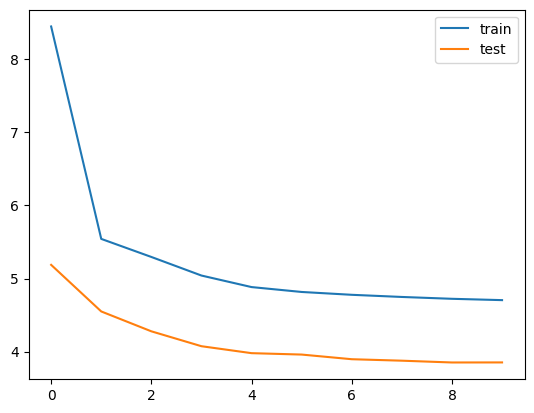

In [ ]:
# Visualize the model learning
from matplotlib import pyplot  # Import the pyplot module from matplotlib for plotting

# Plot the training loss over epochs
pyplot.plot(history.history['loss'], label='train')
# Plot the validation loss over epochs
pyplot.plot(history.history['val_loss'], label='test')

# Add a legend to the plot to differentiate between training and validation loss
pyplot.legend()

# Display the plot
pyplot.show()

In [ ]:
reverse_target_word_index = Y_tokenizer.index_word  # Create a dictionary mapping from index to word for target vocabulary
reverse_source_word_index = X_tokenizer.index_word  # Create a dictionary mapping from index to word for source vocabulary
target_word_index = Y_tokenizer.word_index  # Create a dictionary mapping from word to index for target vocabulary

In [ ]:
latent_dim = 300  # Set the latent dimension for the LSTM layers

# Encode the input sequence to get the feature vector
encoder_model = Model(inputs=encoder_inputs, outputs=[encoder_outputs, state_h, state_c])

# Decoder setup
# Below tensors will hold the states of the previous time step
decoder_state_input_h = Input(shape=(latent_dim,))  # Input for the decoder's hidden state
decoder_state_input_c = Input(shape=(latent_dim,))  # Input for the decoder's cell state
decoder_hidden_state_input = Input(shape=(max_text_len, latent_dim))  # Input for the encoder's output states

# Get the embeddings of the decoder sequence
dec_emb2 = dec_emb_layer(decoder_inputs)  # Apply the embedding layer to the decoder inputs

# To predict the next word in the sequence, set the initial states to the states from the previous time step
decoder_outputs2, state_h2, state_c2 = decoder_lstm(
    dec_emb2, initial_state=[decoder_state_input_h, decoder_state_input_c]
)  # Get the output and states from the decoder LSTM layer

# A dense softmax layer to generate probability distribution over the target vocabulary
decoder_outputs2 = decoder_dense(decoder_outputs2)  # Apply the dense layer to the decoder outputs

# Final decoder model
decoder_model = Model(
    [decoder_inputs] + [decoder_hidden_state_input, decoder_state_input_h, decoder_state_input_c],
    [decoder_outputs2] + [state_h2, state_c2]
)  # Create the final decoder model with inputs and outputs

In [ ]:
def decode_sequence(input_seq):
    # Encode the input as state vectors using the encoder model
    e_out, e_h, e_c = encoder_model.predict(input_seq)
    
    # Generate an empty target sequence of length 1
    target_seq = np.zeros((1, 1))
    
    # Populate the first word of the target sequence with the start word 'sostok'
    target_seq[0, 0] = target_word_index['sostok']

    stop_condition = False  # Initialize the stop condition flag
    decoded_sentence = ''  # Initialize the decoded sentence
    while not stop_condition:
        # Predict the next token and states using the decoder model
        output_tokens, h, c = decoder_model.predict([target_seq] + [e_out, e_h, e_c])

        # Sample a token by selecting the one with the highest probability
        sampled_token_index = np.argmax(output_tokens[0, -1, :])
        sampled_token = reverse_target_word_index[sampled_token_index]
        
        # Append the sampled token to the decoded sentence if it's not the end token 'eostok'
        if sampled_token != 'eostok':
            decoded_sentence += ' ' + sampled_token

        # Exit condition: either hit max length or find the stop word 'eostok'
        if sampled_token == 'eostok' or len(decoded_sentence.split()) >= (max_sum_len - 1):
            stop_condition = True

        # Update the target sequence (of length 1) with the sampled token index
        target_seq = np.zeros((1, 1))
        target_seq[0, 0] = sampled_token_index

        # Update internal states with the new states
        e_h, e_c = h, c

    return decoded_sentence  # Return the decoded sentence

In [ ]:
def seq2summary(input_seq):
    newString = ''  # Initialize an empty string to store the summary
    for i in input_seq:
        # Append the word to the string if it's not a padding token (0), start token ('sostok'), or end token ('eostok')
        if (i != 0 and i != target_word_index['sostok']) and i != target_word_index['eostok']:
            newString = newString + reverse_target_word_index[i] + ' '
    return newString  # Return the generated summary

def seq2text(input_seq):
    newString = ''  # Initialize an empty string to store the text
    for i in input_seq:
        # Append the word to the string if it's not a padding token (0)
        if i != 0:
            newString = newString + reverse_source_word_index[i] + ' '
    return newString  # Return the generated text


In [ ]:
# Iterate over the first 100 training samples
for i in range(0, 100):
    # Print the original review text
    print("Review:", seq2text(X_train[i]))
    
    # Print the original summary
    print("Original summary:", seq2summary(Y_train[i]))
    
    # Predict the summary using the trained model and print it
    print("Predicted summary:", decode_sequence(X_train[i].reshape(1, max_text_len)))
    
    # Print a newline for better readability
    print("\n")

Review: man died tuesday niagara falls injuries going wall falling gorge authorities said ontario special investigations unit investigating death shortly et officer niagara regional police service chasing man agency said time later fell gorge officer police declined identify sustained broken femur airlifted hamilton general hospital man died video scene first showed rescue officer firetruck ladder extended cliff looked second individual raised gorge stretcher body still wrapped white sheets loaded waiting ambulance siu assigned seven investigators two forensic investigations case agency conducts criminal investigations circumstances involving police civilians ended serious injury death allegations sexual assault 
Original summary: officer also fell into the gorge but survived with broken femur the officer was airlifted hospital hamilton ontario ontario special investigations unit investigating the incident 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 262ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step
1

C:\Users\abhin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\models\functional.py:225: UserWarning: The structure of `inputs` doesn't match the expected structure: ['keras_tensor_11', 'keras_tensor_19', 'keras_tensor_17', 'keras_tensor_18']. Received: the structure of inputs=('*', '*', '*', '*')
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━

In [ ]:
def predict():
    # Create dictionaries to map indices to words and words to indices for the target and source vocabularies
    reverse_target_word_index = Y_tokenizer.index_word
    reverse_source_word_index = X_tokenizer.index_word
    target_word_index = Y_tokenizer.word_index

    latent_dim = 300  # Set the latent dimension for the LSTM layers

    # Encode the input sequence to get the feature vector
    encoder_model = Model(inputs=encoder_inputs, outputs=[encoder_outputs, state_h, state_c])

    # Decoder setup
    # Below tensors will hold the states of the previous time step
    decoder_state_input_h = Input(shape=(latent_dim,))  # Input for the decoder's hidden state
    decoder_state_input_c = Input(shape=(latent_dim,))  # Input for the decoder's cell state
    decoder_hidden_state_input = Input(shape=(max_text_len, latent_dim))  # Input for the encoder's output states

    # Get the embeddings of the decoder sequence
    dec_emb2 = dec_emb_layer(decoder_inputs)  # Apply the embedding layer to the decoder inputs

    # To predict the next word in the sequence, set the initial states to the states from the previous time step
    decoder_outputs2, state_h2, state_c2 = decoder_lstm(
        dec_emb2, initial_state=[decoder_state_input_h, decoder_state_input_c]
    )  # Get the output and states from the decoder LSTM layer

    # A dense softmax layer to generate probability distribution over the target vocabulary
    decoder_outputs2 = decoder_dense(decoder_outputs2)  # Apply the dense layer to the decoder outputs

    # Final decoder model
    decoder_model = Model(
        [decoder_inputs] + [decoder_hidden_state_input, decoder_state_input_h, decoder_state_input_c],
        [decoder_outputs2] + [state_h2, state_c2]
    )  # Create the final decoder model with inputs and outputs

    def decode_sequence(input_seq):
        # Encode the input as state vectors using the encoder model
        e_out, e_h, e_c = encoder_model.predict(input_seq)

        # Generate an empty target sequence of length 1
        target_seq = np.zeros((1, 1))

        # Populate the first word of the target sequence with the start word 'sostok'
        target_seq[0, 0] = target_word_index['sostok']

        stop_condition = False  # Initialize the stop condition flag
        decoded_sentence = ''  # Initialize the decoded sentence
        while not stop_condition:
            # Predict the next token and states using the decoder model
            output_tokens, h, c = decoder_model.predict([target_seq] + [e_out, e_h, e_c])

            # Sample a token by selecting the one with the highest probability
            sampled_token_index = np.argmax(output_tokens[0, -1, :])
            sampled_token = reverse_target_word_index[sampled_token_index]

            # Append the sampled token to the decoded sentence if it's not the end token 'eostok'
            if sampled_token != 'eostok':
                decoded_sentence += ' ' + sampled_token

            # Exit condition: either hit max length or find the stop word 'eostok'
            if sampled_token == 'eostok' or len(decoded_sentence.split()) >= (max_sum_len - 1):
                stop_condition = True

            # Update the target sequence (of length 1) with the sampled token index
            target_seq = np.zeros((1, 1))
            target_seq[0, 0] = sampled_token_index

            # Update internal states with the new states
            e_h, e_c = h, c

        return decoded_sentence  # Return the decoded sentence

    def seq2summary(input_seq):
        newString = ''  # Initialize an empty string to store the summary
        for i in input_seq:
            # Append the word to the string if it's not a padding token (0), start token ('sostok'), or end token ('eostok')
            if (i != 0 and i != target_word_index['sostok']) and i != target_word_index['eostok']:
                newString = newString + reverse_target_word_index[i] + ' '
        return newString  # Return the generated summary

    def seq2text(input_seq):
        newString = ''  # Initialize an empty string to store the text
        for i in input_seq:
            # Append the word to the string if it's not a padding token (0)
            if i != 0:
                newString = newString + reverse_source_word_index[i] + ' '
        return newString  # Return the generated text

    # Iterate over the first 100 training samples
    for i in range(0, 100):
        # Print the original review text
        print("Review:", seq2text(X_train[i]))

        # Print the original summary
        print("Original summary:", seq2summary(Y_train[i]))

        # Predict the summary using the trained model and print it
        print("Predicted summary:", decode_sequence(X_train[i].reshape(1, max_text_len)))

        # Print a newline for better readability
        print("\n")

In [ ]:
predict()

Review: man died tuesday niagara falls injuries going wall falling gorge authorities said ontario special investigations unit investigating death shortly et officer niagara regional police service chasing man agency said time later fell gorge officer police declined identify sustained broken femur airlifted hamilton general hospital man died video scene first showed rescue officer firetruck ladder extended cliff looked second individual raised gorge stretcher body still wrapped white sheets loaded waiting ambulance siu assigned seven investigators two forensic investigations case agency conducts criminal investigations circumstances involving police civilians ended serious injury death allegations sexual assault 
Original summary: officer also fell into the gorge but survived with broken femur the officer was airlifted hospital hamilton ontario ontario special investigations unit investigating the incident 
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 667ms/step


C:\Users\abhin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\models\functional.py:225: UserWarning: The structure of `inputs` doesn't match the expected structure: ['keras_tensor_11', 'keras_tensor_27', 'keras_tensor_25', 'keras_tensor_26']. Received: the structure of inputs=('*', '*', '*', '*')
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 254ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━